This notebook is taking data and computing its persistence diagram, determining the energy computation and applying PCA and TDR

In [1]:
from dreimac import GeometryExamples, PlotUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils

In [2]:
import time
import numpy as np
from scipy.spatial import distance

#topological data analysis
from ripser import ripser
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
%matplotlib inline

import math
import cmath
from definitions import pentagon

import random
# import numpy as np

#manifold learning and dim red
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#topological data analysis
from dreimac import CircularCoords, CircleMapUtils

#plotting and visualization
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd
import base64

from matplotlib import cm
# import matplotlib.pyplot as plt
# %matplotlib inline

from itertools import product
from itertools import combinations

def plot_barcodes(diagrams, alpha_max, width = 1.5):
    max_dim = len(diagrams)
    fig, axs = plt.subplots(max_dim)
    fig.suptitle('Barcodes')
    for dim in range(max_dim):
        barcode = np.copy(diagrams[dim])
        ind_inf = np.isinf(barcode.T[1])
        barcode[ind_inf, 1] = alpha_max
        h = 1
        for i in range(len(barcode)):
            x = barcode[i]
            y = [h,h]
            axs[dim].plot(x, y, linestyle= '-', c='#1f77b4', linewidth = width)
            if ind_inf[i]:
                axs[dim].scatter([alpha_max],[h],  s=10, marker='>', c='#1f77b4')
            h += 1
        axs[dim].set_xlim(0, 1.05*alpha_max)
        axs[dim].set_ylim(0,h)
        axs[dim].get_yaxis().set_ticks([]);
        axs[dim].spines['right'].set_color('none')
        axs[dim].spines['top'].set_color('none')
        axs[dim].text(0.3,1,'$\mathrm{bcd}^{\mathcal{R}}_{'+str(dim)+'}(X)$', verticalalignment='bottom')
        
import plotly.express as px
from IPython.display import clear_output

In [3]:
# upload the excel files using pandas

penta2 = np.loadtxt('1. data/M5_large.txt', delimiter=',')

print(penta2.shape)

# print(2%%2)

(55679, 10)


#Converting pentagon data into Standard Form
penta2 = standard_form(penta2)
penta2 = np.array(penta2)

sample1 = penta2[2000]
x_val = []
y_val = []

for i in range(10):
    if i%2 == 0:
        x_val.append(sample1[i])
    else: 
        y_val.append(sample1[i])

print(sample1)
print(x_val)
print(y_val)

plt.plot(x_val, y_val)
plt.scatter(x_val, y_val)

In [ ]:
#Using Ripser, we will find the persistence diagrams
#Here I am referecing code from Demo 6 in Day 5 DREimac

n_land = 1000
res = ripser(penta2, n_perm = n_land, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
fig = plt.figure(figsize = (4,4))
plot_diagrams(dgms)
# fig.savefig('genus4-persistence')

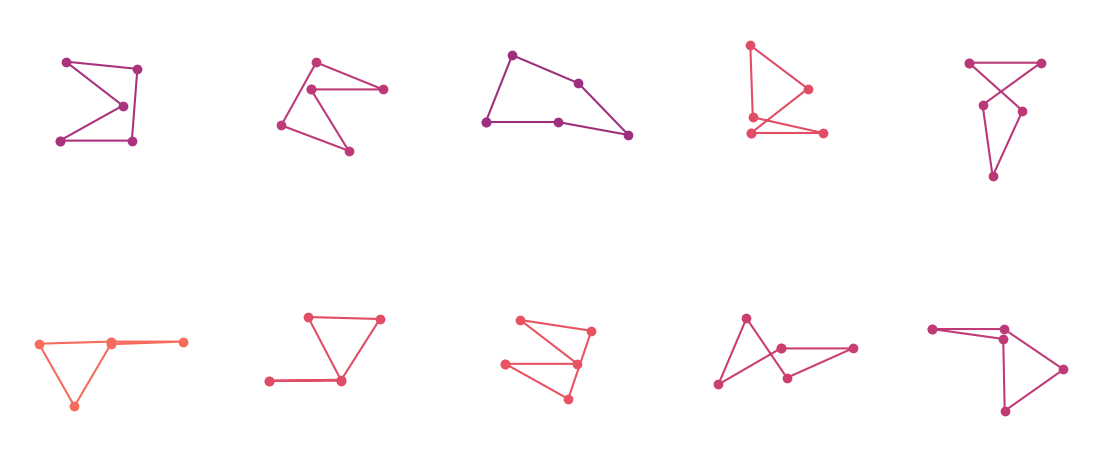

In [4]:
#Energy Computation

angle_data = np.zeros((penta2.shape[0],5)) # internal angles

for i in range(5):
    ii = (2*i -2)%10
    jj = (2*i - 1)%10
    u = penta2[:, [ii, jj]]
    
    ii = (2*i)%10
    jj = (2*i + 1)%10
    v = penta2[:, [ii , jj]]
    
    ii = (2*i + 2)%10
    jj = (2*i + 3)%10
    w = penta2[:, [ii, jj]]
    
    z = np.sum((u - v)*(w-v), axis = 1)
    
    angle_data[:,i]  = np.arccos( np.minimum(z,1) )
    
energy = np.sum((angle_data - (3/5)*np.pi)**2 , axis = 1)

# # plot sample pentagons
# plt.figure(figsize=(14,6))
# for i in range(60):
#     ind = random.randint(0, penta2.shape[0])
#     x = penta2[ind].reshape(5,2).T
#     cent = np.mean(x,axis=1)
#     plt.subplot(6,10,i+1)
#     plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[ind]/np.max(energy)))
#     plt.axis('square')
#     plt.axis('off')
#     plt.xlim(cent[0]-1.3,cent[0]+1.3);
#     plt.ylim(cent[1]-1.3,cent[1]+1.3);

fig = plt.figure(figsize=(14,6))
for i in range(10):
    ind = random.randint(0, penta2.shape[0])
    x = penta2[ind].reshape(5,2).T
    cent = np.mean(x,axis=1)
    plt.subplot(2,5,i+1)
    plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[ind]/np.max(energy)))
    plt.axis('square')
    plt.axis('off')
    plt.xlim(cent[0]-1.3,cent[0]+1.3);
    plt.ylim(cent[1]-1.3,cent[1]+1.3);

In [ ]:
# fig.savefig('genus4-energy')

In [5]:
# pers1 = dgms[1][:,1] - dgms[1][:,0]
# pers2 = dgms[2][:,1] - dgms[2][:,0]

# pers1_sorted = np.sort(pers1)[::-1]
# pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]
# print('Genus 4 Surface')
# print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
# print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

n_lands = 1000

# dist_mat0, pointcloud_permutation0 = GeometryUtils.landmark_geodesic_distance(penta2, n_lands, 20)

# cc = CircularCoords(dist_mat0 , n_landmarks= n_lands, distance_matrix=True)
cc = CircularCoords(penta2 , n_landmarks= n_lands)

coho_classes = [0, 1, 2, 3, 4, 5, 6, 7]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))

# print("space space")
# print(circular_coords)
# print("Shape of Circular Coords")
# print(np.array(circular_coords).shape)

In [6]:
#Applying Circular coords and doing TDR
combos = [[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1]]

thetas= CircleMapUtils.linear_combination(np.array(circular_coords), combos)

#original picture with non geodesic distance and coho classes [0, 1, 3, 4]: [[1,1,0,0], [0,1,0,0],[0,0,1,1]]
# [[1,0,0,0,0], [0,1,0,0,0],[0,0,1,0,0], [-1,0,0,1,0], [0,0,0,0,1]]) #this combo worked for 2 and 4, 2 and 5
# [[1,1,0,0,0], [0,1,0,0,0],[0,0,1,1,0], [0,0,0,1,0], [0,0,0,0,1]] works for 1, 2, 3
theta1 = CircleMapUtils.center(thetas[0])
theta2 = CircleMapUtils.center(thetas[1])
theta3 = CircleMapUtils.center(thetas[2])
theta4 = CircleMapUtils.center(thetas[3])
theta5 = CircleMapUtils.center(thetas[4])
theta6 = CircleMapUtils.center(thetas[5])
theta7 = CircleMapUtils.center(thetas[6])
theta8 = CircleMapUtils.center(thetas[7])


# Plot the data using the computed circular coordintaes, and colors given by pentagon energy
fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta6, 
    mode ='markers', 
    marker=dict(size = 3, color =energy, colorscale='plasma')
)])

fig.update_layout(autosize=False, width=1000, height=1000)

fig.show(renderer='chrome')
#fig.show()

#standard basis and 2,3,7 looks good (Quincy 09/13)
#standard basis and 4,7,8 looks good (Quincy 09/13)


In [ ]:
# fig.write_html("iframe_figures/genus4-circcoords.html")

In [ ]:
# # Initialise the subplot function using number of rows and columns
# figure, axis = plt.subplots(4, 2)
  
# # For 1 and 2 Function
# axis[0, 0].scatter(theta1, theta2)
# axis[0, 0].set_title("1 and 2")
  
# # For 1 and 3 Function
# axis[0, 1].scatter(theta1, theta3)
# axis[0, 1].set_title("1 and 3")
  
# # For 1 and 4 Function
# axis[1, 0].scatter(theta1, theta4)
# axis[1, 0].set_title("1 and 4")
  
# # For 1 and 5 Function
# axis[1, 1].scatter(theta1, theta5)
# axis[1, 1].set_title("1 and 5")

# # For 1 and 6 Function
# axis[2, 0].scatter(theta1, theta6)
# axis[2, 0].set_title("1 and 6")

# # For 1 and 7 Function
# axis[2, 1].scatter(theta1, theta7)
# axis[2, 1].set_title("1 and 7")

# # For 1 and 8 Function
# axis[3, 0].scatter(theta1, theta8)
# axis[3, 0].set_title("1 and 8")
  
# # Combine all the operations and display
# # figure.tight_layout()
# plt.show()

In [ ]:
# # Initialise the subplot function using number of rows and columns
# figure, axis = plt.subplots(4, 2)
  
# # For 1 and 2 Function
# axis[0, 0].scatter(theta2, theta8)
# axis[0, 0].set_title("2 and 8")
  
# # For 1 and 3 Function
# axis[0, 1].scatter(theta2, theta3)
# axis[0, 1].set_title("2 and 3")
  
# # For 1 and 4 Function
# axis[1, 0].scatter(theta2, theta4)
# axis[1, 0].set_title("2 and 4")
  
# # For 1 and 5 Function
# axis[1, 1].scatter(theta2, theta5)
# axis[1, 1].set_title("2 and 5")

# # For 1 and 6 Function
# axis[2, 0].scatter(theta2, theta6)
# axis[2, 0].set_title("2 and 6")

# # For 1 and 7 Function
# axis[2, 1].scatter(theta2, theta7)
# axis[2, 1].set_title("2 and 7")

# # For 1 and 2 Function
# axis[3, 0].scatter(theta2, theta1)
# axis[3, 0].set_title("2 and 1")
  
# # Combine all the operations and display
# # figure.tight_layout()
# plt.show()

In [ ]:
# # Initialise the subplot function using number of rows and columns
# figure, axis = plt.subplots(4, 2)
  
# # For 1 and 2 Function
# axis[0, 0].scatter(theta3, theta2)
# axis[0, 0].set_title("3 and 2")
  
# # For 1 and 3 Function
# axis[0, 1].scatter(theta3, theta4)
# axis[0, 1].set_title("3 and 4")
  
# # For 1 and 4 Function
# axis[1, 0].scatter(theta3, theta5)
# axis[1, 0].set_title("3 and 5")
  
# # For 1 and 5 Function
# axis[1, 1].scatter(theta3, theta6)
# axis[1, 1].set_title("3 and 6")

# # For 1 and 6 Function
# axis[2, 0].scatter(theta3, theta7)
# axis[2, 0].set_title("3 and 7")

# # For 1 and 7 Function
# axis[2, 1].scatter(theta3, theta8)
# axis[2, 1].set_title("3 and 8")

# # For 1 and 8 Function
# axis[3, 0].scatter(theta3, theta1)
# axis[3, 0].set_title("3 and 1")
  
# # Combine all the operations and display
# figure.tight_layout()
# plt.show()

In [ ]:
# # Initialise the subplot function using number of rows and columns
# figure, axis = plt.subplots(4, 2)
  
# # For 1 and 2 Function
# axis[0, 0].scatter(theta4, theta5)
# axis[0, 0].set_title("4 and 5")
  
# # For 1 and 3 Function
# axis[0, 1].scatter(theta4, theta6)
# axis[0, 1].set_title("4 and 6")
  
# # For 1 and 4 Function
# axis[1, 0].scatter(theta4, theta7)
# axis[1, 0].set_title("4 and 7")
  
# # For 1 and 5 Function
# axis[1, 1].scatter(theta4, theta8)
# axis[1, 1].set_title("4 and 8")

# # For 1 and 6 Function
# axis[2, 0].scatter(theta4, theta1)
# axis[2, 0].set_title("4 and 1")

# # For 1 and 7 Function
# axis[2, 1].scatter(theta4, theta2)
# axis[2, 1].set_title("4 and 2")

# # For 1 and 8 Function
# axis[3, 0].scatter(theta4, theta3)
# axis[3, 0].set_title("4 and 3")
  
# # Combine all the operations and display
# figure.tight_layout()
# plt.show()

Here we will load the data and save them as pngs, only run these cell blocks once! If you need to run it more, be sure to restart the images file you create

In [ ]:
# # saving sample pentagons

# for i in range(penta2.shape[0]):
# #     x_val = []
# #     y_val = []

# #     for j in range(10):
# #         if j%2 == 0:
# #             x_val.append(penta2[i][j])
# #         else: 
# #             y_val.append(penta2[i][j])

# #     disp = max(max(x_val), max(y_val))
#     pentagon = plt.figure(figsize=(3,3), clear=True)
# #     ind = random.randint(0, penta2.shape[0])
#     x = penta2[i].reshape(5,2).T
#     cent = np.mean(x,axis=1)
#     plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[i]/np.max(energy)))
#     plt.axis('square')
#     plt.axis('off')
# #     plt.xlim(disp1-0.1, disp1+0.1)
# #     plt.ylim(disp1-0.1, disp1+0.1)
#     plt.xlim(cent[0]-1,cent[0]+1);
#     plt.ylim(cent[1]-1,cent[1]+1);
#     pentagon.savefig('M5 - images/'+str(i)+'.png')
#     pentagon.clf
#     plt.close()

In [ ]:
# # print(penta2[3000])

# x_val = []
# y_val = []

# for i in range(10):
#     if i%2 == 0:
#         x_val.append(penta2[3000][i])
#     else: 
#         y_val.append(penta2[3000][i])



# # plt.plot(x_val, y_val)
# # plt.scatter(x_val, y_val)

# pentagon = plt.figure(figsize=(5,5), clear=True)
# #     ind = random.randint(0, penta2.shape[0])
# x = penta2[3000].reshape(5,2).T
# cent = np.mean(x,axis=1)
# print(cent)
# plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[3000]/np.max(energy)))
# #     plt.axis('square')
# #     plt.axis('off')
# plt.xlim(cent[0]-0.9,cent[0]+0.5);
# plt.ylim(cent[1]-0.5,cent[1]+0.5);
# #     pentagon.savefig('images/'+str(i)+'.png')
# pentagon.clf
# #     plt.close()

Trying to find the cuts for unfolding our genus 4 surface

In [7]:
n_lands=1000
n_neigh = 15

coho_data = np.array([theta1, theta2, theta6]).T

dist_mat, pc_perm = GeometryUtils.landmark_geodesic_distance(coho_data, n_lands, n_neigh)

coho = CircularCoords(dist_mat, distance_matrix=True , n_landmarks= n_lands)

KeyboardInterrupt: 

In [ ]:
coho_classes_p = [0, 1, 3, 4, 5, 6, 7, 8]

circular_coords_coho = []

for i in coho_classes_p:
    circular_coords_coho.append(coho.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))


In [ ]:
# fig = go.Figure(data=[go.Scatter3d(
#     x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], 
#     mode ='markers', 
#     marker=dict(size = 3, color =circular_coords_coho[0], colorscale='plasma')
# )])

# #1, 4

# fig.update_layout(autosize=False, width=700, height=700)

# fig.show()

fig = make_subplots(rows=1, cols=len(circular_coords_coho[4:8]), 
                    subplot_titles = tuple('Circ Coord '+str(i) for i in coho_classes_p[4:8]),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes_p[4:8]]])

for i, coord in enumerate(circular_coords_coho[4:8]):
    fig.add_trace(go.Scatter3d(
        x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], mode ='markers', 
        marker=dict(size = 2 , 
                    color = coord , colorscale = 'plasma'
                    #CMU.to_sinebow(np.pi + CMU.center(coordinates[i]))
                   )),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)


fig.update_layout(showlegend=False)
fig.show(renderer='chrome')
#1, 7 hav potential

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], 
    mode ='markers', 
    marker=dict(size = 3, color =circular_coords_coho[3], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=1000, height=1000)

fig.show(renderer='chrome')

In [ ]:
fig = make_subplots(rows=1, cols=len(circular_coords_coho[4:8]), 
                    subplot_titles = tuple('Circ Coord '+str(i) for i in coho_classes_p[4:8]),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes_p[4:8]]])

for i, coord in enumerate(circular_coords_coho[4:8]):
    fig.add_trace(go.Scatter3d(
        x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], mode ='markers', 
        marker=dict(size = 2 , 
                    color = coord , colorscale = 'plasma'
                    #CMU.to_sinebow(np.pi + CMU.center(coordinates[i]))
                   )),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)


fig.update_layout( showlegend=False )
fig.show()

In [ ]:
raw_coho=CircleMapUtils.linear_combination(np.array(circular_coords_coho), [[1,0,0,0,0,0,0,1], 
                                                                              [0,0,1,0,0,0,1,0],
                                                                              [0,0,0,-1,0,0,0,1],
                                                                              [2,2,0,0,0,0,0,0], 
                                                                              [4,0,0,0,0,0,0,0]])
new_coho=[]
for i in raw_coho:
    new_coho.append(CircleMapUtils.center(i))

# fig = go.Figure(data=[go.Scatter3d(
#     x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], 
#     mode ='markers', 
#     marker=dict(size = 3, color =new_coho[3], colorscale='plasma')
# )])

# #[0,0,0,0,1,1,0,0]

# fig.update_layout(autosize=False, width=700, height=700)

# fig.show(renderer='chrome')
# # [0,-1,0,0,0,0,0,0]

fig = make_subplots(rows=1, cols=len(new_coho), 
                    subplot_titles = tuple('Circ Coord '+str(i) for i in coho_classes_p[0:5]),
                    specs = [[{'type': 'scatter3d'} for i in coho_classes_p[0:5]]])

for i, coord in enumerate(new_coho):
    fig.add_trace(go.Scatter3d(
        x=theta1[pc_perm], y=theta2[pc_perm], z=theta6[pc_perm], mode ='markers', 
        marker=dict(size = 2 , 
                    color = coord , colorscale = 'plasma'
                    #CMU.to_sinebow(np.pi + CMU.center(coordinates[i]))
                   )),  
        row=1, col=i+1)
    fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
                      yaxis=dict( ticks='', showticklabels=False), 
                      zaxis=dict( ticks='', showticklabels=False), 
                      aspectmode='data', row=1, col=i+1)


fig.update_layout(showlegend=False)
fig.show(renderer='chrome')

In [ ]:
#take in cuts as a list circular coordinate arrays
from sklearn.neighbors import NearestNeighbors

cuts=new_coho

#calculate the k nearest neighbors graph

n_land = 900
k_neigh = 20
nbrs = NearestNeighbors(n_neighbors=k_neigh, algorithm='ball_tree').fit(coho_data)
distances, indices = nbrs.kneighbors(coho_data)

#the output is a list of pairs of ndarrays that has length n_data. For any row (each representing a point),
#the first element of the pair is the indices in the data for the k nearest points
#and the second element is the distance between each point and the current row (point).
simplicial_complex=[[indices[i],distances[i]] for i in range(len(indices))]

In [ ]:
print(len(simplicial_complex))

In [ ]:
#this function makes cuts and takes in a list of circular coords arrays as well as a neighbor graph and outputs a cut graph
def cut_neighbors(cuts, neighbor_graph):
    removals=0
    for ind, point in enumerate(neighbor_graph):
        counts=[]
        for count, i in enumerate(point[0]):
            if any(np.abs(cut[ind]-cut[i]) > 1.8*np.pi for cut in cuts):
                counts.append(count)
                removals+=1
        neighbor_graph[ind][0]=np.delete(neighbor_graph[ind][0],counts)
        neighbor_graph[ind][1]=np.delete(neighbor_graph[ind][1],counts)
    print('Removals: ',removals)
    return neighbor_graph

new_neighbor_graph=cut_neighbors([cuts[2]], simplicial_complex)


In [ ]:
#now we transform our cut up graph into a numpy distance matrix and then a compressed sparse matrix
#we can do this because out neighbors graph contained distance data in it

from scipy.sparse import csr_matrix

kneighbors_graph=np.zeros((penta2.shape[0],penta2.shape[0]))
for count, info in enumerate(simplicial_complex):
    for place, ind in enumerate(info[0]):
        kneighbors_graph[count,ind]=info[1][place]
kneighbors_graph=csr_matrix(kneighbors_graph)

In [ ]:
#calculating geodesic distance matrix
from scipy.sparse.csgraph import shortest_path

n_landmarks=800

n_points = coho_data.shape[0]
perm = np.zeros(n_landmarks, dtype=np.int64)
lambdas = np.zeros(n_landmarks)
ds = shortest_path(kneighbors_graph, indices=0, directed=False)
D = np.zeros((n_landmarks, n_points))
D[0, :] = ds
for i in range(1, n_landmarks):
    idx = np.argmax(ds)
    perm[i] = idx
    lambdas[i] = ds[idx]
    thisds = shortest_path(kneighbors_graph, indices=idx, directed=False)
    D[i, :] = thisds
    ds = np.minimum(ds, thisds)

perm_rest_points = np.setdiff1d(
np.arange(0, n_points, dtype=int), perm, assume_unique=True
)
perm_all_points = np.concatenate((perm, perm_rest_points))

dist_landmarks_points = D[:, perm_all_points]

In [ ]:
#check that the distance matrix has no infinity values

inf_in_mat=[]
for i in dist_landmarks_points:
    if list(np.isinf(i)).count(True)==0:
        inf_in_mat.append(True)
    else:
        inf_in_mat.append(False)
        break

print('Distance matrix has no infinity values: ',all(inf_in_mat))

In [ ]:
#using scipy to calculate the multi-dimensional scaling of the distance matrix
from sklearn import manifold

mds= manifold.MDS(
    n_components=2,
    metric=True,
    dissimilarity="precomputed",
    normalized_stress='auto'
)
unfolding = mds.fit_transform(dist_landmarks_points[:,0:dist_landmarks_points.shape[0]])

In [ ]:
#plt.scatter(unfolding[:, 0], unfolding[:, 1], color="navy")

fig = go.Figure(data=[go.Scatter(
    x=unfolding[:, 0], y=unfolding[:, 1], 
    mode ='markers', 
    marker=dict(size = 7, color =energy[perm], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=1000, height=1000)

fig.show(renderer='chrome')

In [ ]:
# classes=4
# possible_coefficients=[0,1]

# vectors=[list(x) for x in product(possible_coefficients, repeat=classes)][1:]
# combos=[list(x) for x in combinations(vectors, 4)]

In [ ]:
# possible_combo = []
# for i in range(len(combos)):
#     thetas_prime = CircleMapUtils.linear_combination(circular_coords_coho,combos[i])
#     thetas_prime.shape
#     #[1,2,1,0]
#     # [1,1,1,0], [0,1,0,1],[0,0,1,0], [0,0,0,1]
# #     print(combos[i])
#     fig = make_subplots(rows=1, cols=len(coho_classes), 
#                         subplot_titles = tuple('Circ Coord '+str(i) for i in coho_classes),
#                         specs = [[{'type': 'scatter3d'} for i in coho_classes]])

#     for i, coord in enumerate(circular_coords_coho):
#         fig.add_trace(
#             go.Scatter3d(x=theta1, y=theta2, z=theta3,   mode ='markers', 
#             marker=dict(size = 2 , color = (thetas_prime[i]))),  
#             row=1, col=i+1)
#         fig.update_scenes(xaxis=dict( ticks='', showticklabels=False), 
#                           yaxis=dict( ticks='', showticklabels=False), 
#                           zaxis=dict( ticks='', showticklabels=False), 
#                           aspectmode='data', row=1, col=i+1)

#     fig.update_layout( showlegend=False )
#     fig.show()
#     decision = input("Possible Cut (Y/N):")
#     if decision == 'Y':
#         possible_combo1.append(i)
#     clear_output(wait=True)

Now, we will try and implement the hover data to PCA for the genus 3 surface.
NOTE: When running the hover data box, you can only implement it once per kernel start up. So, if you run it, then made fixes to the code, restart the kernel, run the required code and it will implement correctly.

In [ ]:
#PCA
pca = PCA(n_components=5)
data_pca = pca.fit(penta2).transform(penta2)

print('Explained Variance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca[:,0], y=data_pca[:,1], z=data_pca[:,2], 
    mode ='markers', 
    marker=dict(size = 3, color =energy, colorscale='plasma' , opacity = 1)
)])

fig.update_layout(autosize=False, width=700, height=700)  

fig.show()

In [ ]:
# fig = go.Figure(data=[go.Scatter3d(
#     x=data_pca[:,0], y=data_pca[:,1], z=data_pca[:,2], 
#     mode ='markers', 
#     marker=dict(size = 3, color =energy, colorscale='plasma' , opacity = 1)
# )])

fig.update_traces(hoverinfo="none", hovertemplate=None)
fig.update_layout(
    scene = dict(
        xaxis = dict(range=[-2,2],),
        yaxis = dict(range=[-2,2],),
        zaxis = dict(range=[-1,1],),
    ), width=700, height=700
)

app = JupyterDash(__name__)

server = app.server

app.layout = html.Div([
    dcc.Graph(id="graph-basic-2", figure=fig, clear_on_unhover=True),
    dcc.Tooltip(id="graph-tooltip"),
])


@app.callback(
    Output("graph-tooltip", "show"),
    Output("graph-tooltip", "bbox"),
    Output("graph-tooltip", "children"),
    Input("graph-basic-2", "hoverData"),
)

def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update

    # demo only shows the first point, but other points may also be available
    pt = hoverData["points"][0]
    bbox = pt["bbox"]
    num = pt["pointNumber"]

    img_fname = 'genus 3 - images/'+str(num)+'.png'
    encoded_img = base64.b64encode(open(img_fname, 'rb').read())

    children = [
        html.Div([
            html.Img(src='data:image/png;base64,{}'.format(encoded_img.decode()), style={'width': '100%'}),
        ], style={'width': '80px', 'white-space': 'normal'})
    ]

    return True, bbox, children

app.run_server(mode="inline")
